In [15]:
import time
import torch
from torch import nn
import torchvision
from torch.utils import data
from torchvision import transforms
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

<div class="container-fluid">
   <div class="row">
       <div class="col-lg-6">
           <div class="jumbotron jumbotron-fluid">
               <p class="display-1 h1"><b>卷积神经网络</b></p>
               <hr class="my-4">
               <p class="h2" style="font-size:4rem">李岩</p>
           </div>
       </div>
       <div class="col-lg-6">
          <img src="convNet.jpeg">
       </div>
    </div>
</div>

- 最早发布的卷积神经网络之一，因其在计算机视觉任务中的高效性能而受到广泛关注。

- 模型是由AT&T贝尔实验室的研究员Yann LeCun在1998年提出的，目的是识别图像中的手写数字。

- 当时，LeNet取得了与**支持向量机**性能相媲美的成果，成为监督学习的主流方法。 

- LeNet在美国被广泛用于自动取款机（ATM）机中，帮助识别处理支票的数字。

<div class="alert alert-danger" style="font-family:Microsoft YaHei"><strong>手写数字的识别</strong></div>

<center><img src="mnist0.png" width=55%></center>

**LeCun et al., 1998**

LeCun, Y., Bottou, L., Bengio, Y., Haffner, P., & others. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278–2324.

# LeNet

## LeNet的基本构成

- 总体来看，**LeNet（LeNet-5）由两个部分组成**
    * **卷积编码器**：由两个卷积层组成;
    * **全连接层密集块**：由三个全连接层组成。

- 该网络的架构如下，模型的输入是手写数字，输出为10种可能结果的概率。
<center><img src="../img/6_convolutional_neural_networks/lenet.svg" width=100%></center>

- 每个卷积块中的基本单元是一个卷积层、一个sigmoid激活函数和平均汇聚层。
    - 虽然ReLU和最大汇聚层更有效，但它们在20世纪90年代还没有出现。

- 每个卷积层使用$5\times 5$卷积核和一个sigmoid激活函数。
- 第一卷积层有6个输出通道，而第二个卷积层有16个输出通道。

- 每个$2\times2$汇聚操作（步幅2）通过空间下采样将维数减少4倍。
- 卷积的输出形状由批量大小、通道数、高度、宽度决定。

- 为了将卷积块的输出传递给全连接层（稠密块），必须在**小批量中展平**每个样本。
    - 换言之，将这个四维输入转换成全连接层所期望的二维输入。这里的二维表示的第一个维度索引小批量中的样本，第二个维度给出每个样本的平面向量表示。

- LeNet的稠密块有三个全连接层，分别有120、84和10个输出。因为在执行分类任务，所以输出层的10维对应于最后输出结果的数量。

## LeNet的简明结构与代码实现

<center> <img src='../img/6_convolutional_neural_networks/lenet-vert.svg' width=60%> </center>

In [2]:
class Reshape (torch.nn.Module):
    # 将原始数据转换成4维张量，第一个维度是批量、第二个维度是输入通道数
    def forward(self, x):
        return x.view (-1, 1, 28,28)

In [3]:
# 构建LeNet

lenet = torch.nn.Sequential(
    Reshape(), 
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(), # nn.Flatten()展平数据
    nn.Linear(16 * 5* 5, 120), nn.Sigmoid(), 
    nn.Linear(120, 84), nn.Sigmoid(), 
    nn.Linear(84, 10))

```python
torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)
```
- 平均汇聚层

In [4]:
# 生成数据
X = torch.rand(size=(1,1,28,28), dtype=torch.float32)

# 打印每层的名称和形状
for layer in lenet:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t ', X.shape)

Reshape output shape: 	  torch.Size([1, 1, 28, 28])
Conv2d output shape: 	  torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	  torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	  torch.Size([1, 6, 14, 14])
Conv2d output shape: 	  torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	  torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	  torch.Size([1, 16, 5, 5])
Flatten output shape: 	  torch.Size([1, 400])
Linear output shape: 	  torch.Size([1, 120])
Sigmoid output shape: 	  torch.Size([1, 120])
Linear output shape: 	  torch.Size([1, 84])
Sigmoid output shape: 	  torch.Size([1, 84])
Linear output shape: 	  torch.Size([1, 10])


<div class="alert alert-danger" style="font-family:Microsoft YaHei"><b>MNist数据集</b></div>

- 50,000个训练数据
- 10,000个测试数据
- 图像大小28x 28

<center><img src="mnist1.png" class='float-right' width=40%></center>


<div class="alert alert-danger" style="font-family:Microsoft YaHei"><b>MNist数据集的影响力</b></div>

- 机器学习、机器视觉、人工智能、深度学习领域的衡量算法的基准之一。
- 会议、期刊论文中都会发现这个数据集的身影。
- 已经成为算法作者的必测的数据集之一。

>如果一个算法在MNist不work，那么它就根本没法用。

# LeNet 的代码实现

<div class="alert alert-danger" style="font-family:Microsoft YaHei"><b>选择FashionMNist数据集</b></div>

- MNist 太简单，很多算法在测试集上的性能已经达到 99.6%！
- FashionMNist 的大小、格式和训练集/测试集划分与原始的 MNist 完全一致。60000/10000 的训练测试数据划分，28x28 的灰度图片。可以直接用该数据集测试机器学习和深度学习算法性能，且不需要改动任何代码。

<div class="alert alert-danger" style="font-family:Microsoft YaHei"><strong>查看LeNet在Fashion-MNIST数据集上的表现</strong></div>

In [17]:
import sys
sys.path.append('/home/teaching/slides/deeplearning/3_linear_network')
# 将load_data_fashion_mnist函数所在路径加入系统环境变量路径中

from softmax_regression_scratch import load_data_fashion_mnist, Accumulator, Animator, accuracy

In [7]:
batch_size = 256 
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

In [19]:
def evaluate_accuracy_gpu(net, data_iter, device=None): 
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()
        if not device: 
            device = next(iter(net.parameters())).device
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [9]:
class Timer:
    """Record multiple running times."""
    def __init__(self):
        """Defined in :numref:`sec_minibatch_sgd`"""
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

In [20]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):# 比之前的train_ch3多个device参数
    """用GPU训练模型(在第六章定义)"""
    
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'],figsize=(12,8))
    timer, num_batches = Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2] 
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:  
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))  
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')       

<div class="alert alert-danger" style="font-family:Microsoft YaHei"><b>训练和评估LeNet-5模型</b></div>

In [13]:
def cpu():
    """Get the CPU device.

    Defined in :numref:`sec_use_gpu`"""
    return torch.device('cpu')

def gpu(i=0):
    """Get a GPU device.

    Defined in :numref:`sec_use_gpu`"""
    return torch.device(f'cuda:{i}')

def num_gpus():
    """Get the number of available GPUs.

    Defined in :numref:`sec_use_gpu`"""
    return torch.cuda.device_count()

def try_gpu(i=0):
    """Return gpu(i) if exists, otherwise return cpu()."""
    if num_gpus() >= i + 1:
        return gpu(i)
    return cpu()

loss 0.474, train acc 0.820, test acc 0.798
6469.6 examples/sec on cpu


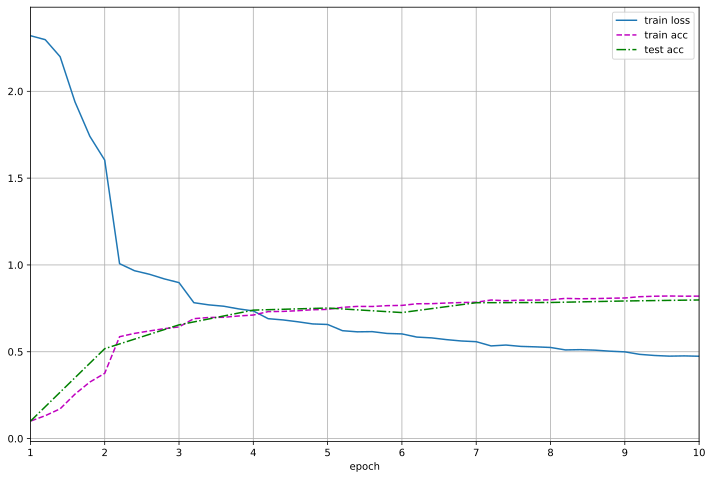

In [21]:
lr, num_epochs = 0.9, 10
train_ch6(lenet, train_iter, test_iter, num_epochs, lr, try_gpu())

从模型表现来看，
- 运行速度，每秒处理2.1万个样本，运行30个epoch以后，训练准确率0.88，测试准确率0.85。
- 基本没有出现过拟合（注意不是过拟合的时候，考虑是否欠拟合）。
- 跟mlp相比，模型明显小（参数受限），较不容易出现过拟合。

<div class="alert alert-danger" style="font-family:Microsoft YaHei"><b>启发——我们如何设置我们的深度网络？</b></div>

- 不断使得图片变小
- 不断增加通道的数量，将关键特征提取出来
- 最后将关键特征进行全连接的融合

> 在未来的各式深度网络中，这个规律都存在。

<div class="alert alert-danger" style="font-family:Microsoft YaHei"><b>总结</b></div>

- LeNet是最早成功的深度学习网络
- 共使用2个卷积层来学习图片空间信息（提取关键特征），通道数从1扩展到6，再扩展到16
- 在每个卷积层后面应用一个平均池化层，减小对图像的敏感性
- 最后使用3个全连接层转换到类别空间
- LeNet的网络结构设计具有较强的启发性。